# Métricas de avaliação no aprendizado não supervisionado
- "Avaliar o desempenho de um algoritmo de agrupamento **não é tão trivial** quanto contar o número de erros ou a precisão e recuperação de um algoritmo de classificação supervisionado." 
    - "Em particular, qualquer métrica de avaliação **não deve levar em consideração os valores absolutos dos rótulos do cluster**, mas sim se esse agrupamento definir separações dos dados semelhantes a algum conjunto de classes de verdade básica ou satisfazer alguma suposição de que os **membros pertencem à mesma classe são mais semelhantes do que membros de classes diferentes de acordo com alguma métrica de similaridade**."

<a id='kmeans'></a>
- Importando o dataset iris
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [1]:
# Importando o dataset iris
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True,as_frame=True)

In [2]:
# Selecionando apenas as colunas de pétala
X_iris = X[['petal length (cm)','petal width (cm)']]

- **Visualizando graficamente os pontos**
    - https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

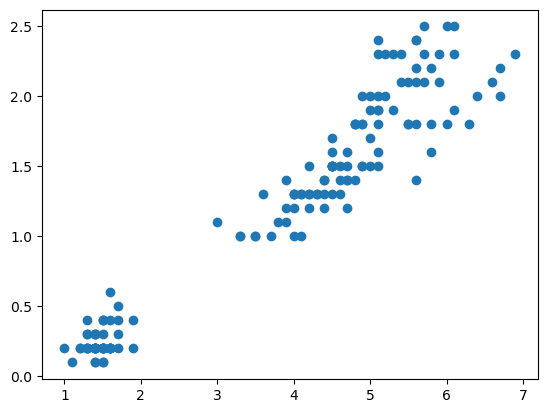

In [3]:
# Plotando o gráfico com esses dados
import matplotlib.pyplot as plt

# plot
fig, ax = plt.subplots()

ax.scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'])

plt.show()

- **Utilizando o K-means**
    - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [4]:
# Importando o KMeans
from sklearn.cluster import KMeans

In [5]:
# Utilizando o algoritmo
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_iris)

In [6]:
# Verificando quais foram os labels determinados pelo k-means
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

- **Quando temos os rótulos dos dados, podemos comparar os clusters gerados com os valores esperados (target)**

In [7]:
# Criando um DataFrame já com os labels gerados acima
import pandas as pd
iris = pd.concat([X,y],axis=1)
iris['labels'] = kmeans.labels_
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,labels
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0


In [8]:
# Verificando a relação entre target e labels
iris[['target','labels']].value_counts()

target  labels
0       0         50
1       2         48
2       1         46
        2          4
1       1          2
dtype: int64

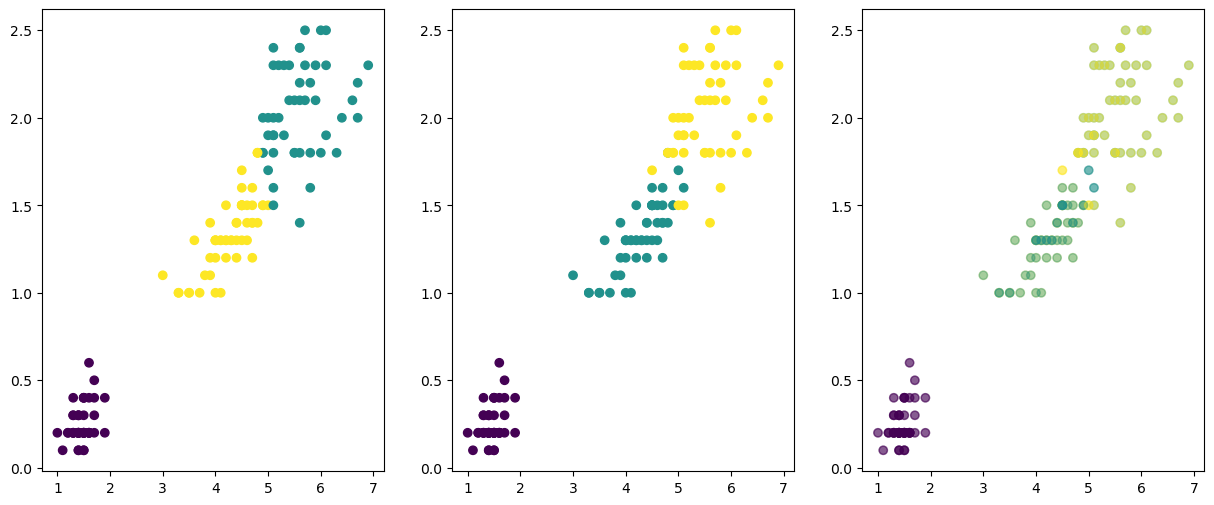

In [9]:
# Visualizando graficamente essa informação
fig, ax = plt.subplots(ncols=3,figsize=(15,6))

ax[0].scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'],c=iris.labels)
ax[1].scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'],c=iris.target)
ax[2].scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'],c=iris.labels,alpha=0.4)
ax[2].scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'],c=iris.target,alpha=0.4)

plt.show()

In [10]:
# Criando uma função para mudar esses números por letras
def numero_letra(valor):
    lista = ['A','B','C']
    return lista[valor]

In [12]:
# Aplicando a função
iris['grupos'] = iris.labels.apply(numero_letra)

In [18]:
# Agora novamente visualizando a relação entre os grupos e os targets
resultados_k3 = iris[['target','grupos']].value_counts().reset_index(name='cont')

In [23]:
# Transformando esses dados em uma tabela
tabela_k3 = resultados_k3.pivot_table(index='target',columns='grupos',values='cont',fill_value=0).rename_axis(index=None,columns=None)

In [24]:
# Visualizando essa tabela
tabela_k3

,A,B,C
0,50,0,0
1,0,2,48
2,0,46,4


In [31]:
# Vamos começar analisando a tabela para k = 3 e utilizando o target mais 
# presente no cluster como previsão para aquele cluster
classes_k3 = tabela_k3.idxmax().reset_index()
classes_k3.columns = ['grupos','y_pred']
classes_k3

,grupos,y_pred
0,A,0
1,B,2
2,C,1


In [34]:
# Podemos criar uma tabela unindo as classes com o nosso dataset original
merge_k3 = pd.merge(
                iris,
                classes_k3,
                how='left',
                on='grupos')

In [36]:
# E então verificar a relação entre y_true e y_pred
merge_k3[['target','y_pred']].value_counts()

target  y_pred
0       0         50
1       1         48
2       2         46
        1          4
1       2          2
dtype: int64

In [ ]:
# Importando o metrics do sklearn

In [ ]:
# E avaliando a matriz de confusão

In [ ]:
# A acurácia

In [ ]:
# precisão

In [ ]:
# e recall

- **Podemos fazer o mesmo processo para k = 2 e comparar o resultado**

In [ ]:
# Utilizando o algoritmo

In [ ]:
# Criando um DataFrame já com os labels gerados acima

In [ ]:
# Verificando a relação entre target e labels

In [ ]:
# Visualizando graficamente essa informação

In [ ]:
# Aplicando a função

In [ ]:
# Agora novamente visualizando a relação entre os grupos e os targets

In [ ]:
# Transformando esses dados em uma tabela

In [ ]:
# Visualizando essa tabela

In [ ]:
# Vamos começar analisando a tabela para k = 3 e utilizando o target mais 
# presente no cluster como previsão para aquele cluster

In [ ]:
# Podemos criar uma tabela unindo as classes com o nosso dataset original

In [ ]:
# E então verificar a relação entre y_true e y_pred

In [ ]:
# E avaliando a matriz de confusão

In [ ]:
# A acurácia

In [ ]:
# precisão

In [ ]:
# e recall

- **Métricas para avaliação de clusterizações**
    - https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

- **1. Índice Rand**
    - https://scikit-learn.org/stable/modules/clustering.html#rand-index
    - mede a semelhança de classe e cluster entre os pares de pontos
    - **Depende de termos os rótulos / labels**
    - A [fórmula é dada por](https://en.wikipedia.org/wiki/Rand_index):
        <img src="https://drive.google.com/uc?id=1_eGU36rS0OTEaZ6JvckTcm2dZb-fmJaG" style='width: 250px;' />
    - Onde:
        - a: número de pares que pertencem **a mesma classe e ao mesmo cluster**
        - b: número de pares que pertencem **a classes diferentes e a clusters diferentes**
        - c: número de pares que pertencem **a mesma classe e a clusters diferentes**
        - d: número de pares que pertencem **a classes diferentes e ao mesmo cluster**

In [ ]:
# Considerando os mesmos dados que utilizamos no início desse módulo
dados = pd.DataFrame({
     'x': [1,2,3,2,7,8,6,7],
     'y': [2,1,2,3,6,6,7,8],
     'target': [0,0,0,1,1,1,0,1]
 })

In [ ]:
# Podemos exibir esses dados
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(dados.x,dados.y,c=dados.target)

for i in range(0,len(dados)):
    ax.annotate(i+1,(dados.x[i],dados.y[i]),
                ha='center',
                xytext=(0,7),
                textcoords='offset points'
               )

plt.show()

In [ ]:
# Criando um novo X para esses dados

In [ ]:
# E utilizando o kmeans

In [ ]:
# Podemos visualizar a classificação desses pontos

- Vamos avaliar esses pares:
    - par 1 e 2: pertencem a mesma classe e ao mesmo cluster -> a
    - par 1 e 3: também -> a
    - par 1 e 4: pertencem a classes diferentes mas ao mesmo cluster  -> d
    - par 4 e 7: pertencem a classes diferentes e a clusters diferentes -> b
- Classificando todos os pares:
    - a = 6 (número de pares que pertencem a mesma classe e ao mesmo cluster)
        - 1-2,1-3,2-3,5-6,5-8,6-8
    - b = 10 (número de pares que pertencem a classes diferentes e a clusters diferentes)
        - 1-5,1-6,1-8,2-5,2-6,2-8,3-5,3-6,3-8,4-7
    - c =  6 (número de pares que pertencem a mesma classe e a clusters diferentes)
        - 1-7,2-7,3-7,4-5,4-6,4-8
    - d = 6 (número de pares que pertencem a classes diferentes e ao mesmo cluster)
        - 1-4,2-4,3-4,5-7,6-7,7-8

In [ ]:
# Calculando o RI
# RI = (a+b)/(a+b+c+d)

In [ ]:
# Agora utilizando o rand_score do sklearn

- **Porém o índice rand tem alguns problemas como ter valores altos mesmos para dados aleatórios e aumentar a medida que aumentamos o número de grupos**
- **Para resolver podemos usar o `adjusted_rand_score`**
    - Para uma clusterização aleatória, seu valor é 0
    - O máximo é 1
    - Valores negativos representam clusterizações piores que escolher de forma aleatória os clusters

In [ ]:
# Testando diferentes valores de k

In [ ]:
# RI

In [ ]:
# ARI (Índice Rand Ajustado)

In [ ]:
# Calculando os dois índices para diferentes valores de k

In [ ]:
# Verificando graficamente

- **Podemos usar o rand score e o rand score ajustado para o dataset iris**

In [ ]:
# Calculando o rand_score para o dataset iris utilizando o y_pred

In [ ]:
# Calculando o rand_score AJUSTADO para o dataset iris utilizando o y_pred

In [ ]:
# Agora utilizando os labels para o rand_score

In [ ]:
# E os labels para o rand_score ajustado

In [ ]:
# Calculando para diferentes valores de K no dataset iris

In [ ]:
# E então visualizando graficamente

- **2. Medida V**
    - https://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure
    - Analisa 2 informações em relação aos dados (que variam de 0 a 1):
        - homogeneidade: cada cluster possui apenas membros de uma única classe
        - completude: todos os membros de uma classe estão no mesmo cluster
    - **Depende dos rótulos**
    - Para amostras pequenas ou um número grande de clusters, é mais seguro usar um índice ajustado como o rand ajustado (visto acima)
    - A medida V será dada pela média harmônica entre a homogeneidade e a completude
        - Sendo **beta (default=1) a razão entre o peso atribuído a homogeneidade x completude**
        <img src="https://drive.google.com/uc?id=1RPW0UU6840jIWHrEUYMSUKy69Q6O7HbG" style='width: 350px;' />

In [ ]:
# Considerando esse mesmo DataFrame
dados = pd.DataFrame({
     'x': [1,2,3,2,7,8,6,7],
     'y': [2,1,2,3,6,6,7,8],
     'target': [0,0,0,1,1,1,0,1]
 })

In [ ]:
# Testando diferentes valores de k

In [ ]:
# Visualizando 

In [ ]:
# Calculando a homogeneidade

In [ ]:
# a completude

In [ ]:
# e a medida v

- **Podemos alterar os targets e visualizar como seriam esses parâmetros**

In [ ]:
# Calculando os 3 indicadores em relação a k

In [ ]:
# E então visualizando graficamente

- **Também podemos fazer o mesmo com o dataset iris**

In [ ]:
# Visualizando a tabela que vimos acima

- Quando falamos de homogeneidade estamos falando das colunas, e quando falamos de completude estamos falando das linhas

In [ ]:
# Calculando a homogeneidade para essa tabela acima

In [ ]:
# Calculando também a completude

In [ ]:
# E a medida V

In [ ]:
# Criando o gráfico dos 3 indicadores em relação a k

In [ ]:
# Visualizando graficamente

- **3. Inércia (soma dos erros ao quadrado)**
    - mesma métrica que usamos no método do cotovelo
    - aumenta com o aumento de k
    - **Independe dos rótulos**

In [ ]:
# Criando o gráfico de inércia que vimos nas aulas anteriores

In [ ]:
# Visualizando o gráfico de inércia x K

- **4. "Coeficiente Silhueta"**
    - https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
    - Quanto maior esse coeficiente, mais bem definidos são os clusters do modelo
    - Vamos considerar 2 pontuações
        - **a:** A distância média **entre uma amostra e todos os outros pontos da mesma classe**
        - **b:** A distância média **entre uma amostra e todos os outros pontos no outro cluster mais próximo**
    - **Ele avalia tanto a distância intracluster (o quanto os pontos estão afastados dentro do próprio cluster) quando a distância interclusters (o quanto os clusters estão afastados entre si)**
    - O [coeficiente para uma amostra é dado pela fórmula abaixo](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples)
    <img src="https://drive.google.com/uc?id=1iW9amVJNfL9qpLd6swEHnKg4qse-gPIL" style='width: 250px;' />
    - O coeficiente para o conjunto de amostras é dado utilizando a média desse coeficiente para cada amostra

In [ ]:
# Agora considerando esse novo dataset sem os targets
dados2 = pd.DataFrame({
     'x': [1,2,3,2,7,8,6,7],
     'y': [2,1,2,3,6,6,7,8]
 })

In [ ]:
# Utilizando o K-Means para clusterizar esses dados

In [ ]:
# Visualizando graficamente

In [ ]:
# Calculando o silhouette_score PARA CADA UM DOS PONTOS

In [ ]:
# Considerando o primeiro ponto dessa lista

In [ ]:
# Podemos adicionar o label nesses DataFrame

In [ ]:
# Visualizando

In [ ]:
# Considerando todos os dados que estão no mesmo cluster do ponto vermelho

In [ ]:
# E os dados que estão no outro cluster

In [ ]:
# Selecionando o ponto vermelho

In [ ]:
# Podemos calcular as distâncias de cada um dos pontos da mesma classe

In [ ]:
# E usar o numpy para fazer a média dessa lista

In [ ]:
# Então podemos calcular a distância aos pontos de classes diferentes

In [ ]:
# E também calcular essa média

In [ ]:
# O máximo entre a e b é dado por

In [ ]:
# Calculando s

In [ ]:
# Agora utilizando o silhouette_samples para visualizar o resultado novamente

In [ ]:
# Tirando a média do array

In [ ]:
# Agora calculando o silhouette_score

In [ ]:
# Podemos visualizar o silhouette_score para diferentes valores de K

In [ ]:
# E traçar esse gráfico

- **Também podemos traçar o gráfico de silhueta utilizando a silhueta de cada ponto de dado**
    - https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [ ]:
# Considerando um valor de K

In [ ]:
# Podemos adicionar o valor do silhouette_score para cada um dos pontos no nosso DataFrame

In [ ]:
# E então ordenar os dados de acordo com o label e o silhouette_score

In [ ]:
# Visualizando essa tabela

In [ ]:
# Para visualizar as cores, podemos utilizar o nipy_spectral do matplotlib

In [ ]:
# E agora traçar o gráfico do silhouette_score junto ao gráfico dos pontos para melhorar a visualização

- Podemos fazer o mesmo para o dataset iris

In [ ]:
# Considerando qualquer valor de K

In [ ]:
# Adicionando o valor do silhouette_score para cada um dos pontos no nosso DataFrame

In [ ]:
# Ordenando os dados

In [ ]:
# Selecionando as cores

In [ ]:
# E agora traçando esses gráficos

- Se quiser podemos colocar tudo isso em um único gráfico, apesar de que isso pode gerar muita poluição visual

In [ ]:
# Criando o kmeans para k = 2

In [ ]:
# Criando o kmeans para k = 3

In [ ]:
# Criando uma figura com 2 linhas e 2 colunas